# COMUNICACION DE RESULTADOS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

#Minicubo:

metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc','m2','room_type']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

minicubo_precio = df[dimensiones + metricas]

minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')

In [3]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         8324 non-null   int64  
 1   index                           8324 non-null   int64  
 2   id                              8324 non-null   int64  
 3   name                            8324 non-null   object 
 4   host_id                         8324 non-null   int64  
 5   neighbourhood_group             8324 non-null   object 
 6   neighbourhood                   8324 non-null   object 
 7   latitude                        8324 non-null   float64
 8   longitude                       8324 non-null   float64
 9   room_type                       8324 non-null   object 
 10  price                           8324 non-null   int64  
 11  minimum_nights                  8324 non-null   int64  
 12  calculated_host_listings_count  83

## CONTEXTO DEL ANALISIS

La empresa ha seleccionado la ciudad de Valencia como candidata para buscar inmuebles en los que invertir con el objetivo de obtener rentabilidad mediante alquiler turístico.

Para ello, antes de poner al equipo de valoraciones a buscar oportunidades, la dirección ha encargado al equipo de Data Science un análisis de Discovery que permita identificar estrategias o líneas de trabajo que ayuden a dirigir la actuación del equipo de valoraciones.

## OBJETIVOS

* Analizar las fuentes de datos públicas disponibles
* Para encontrar insights que ayuden a entender las características del mercado en esta ciudad
* Y guíen el trabajo de búsqueda del equipo de valoraciones
* Especialmente en cuanto a los principales ejes: precio del alquiler, niveles de ocupación y precio de compra

## CONCLUSIONES EJECUTIVAS

* Se han localizado 10 barrios en los que centrar la búsqueda
* Se recomienda buscar inmuebles con dos habitaciones,3-4 camas, de 70 m2 y para alojar 4-5 huéspedes.
* Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Alquilarlos en calidad de apartamento completo


## DETALLE DE LOS PRINCIPALES RESULTADOS

### Existen 10 barrios con alto potencial de inversión

* Se han localizado 8 barrios que apriori pueden maximizar la relación coste-ingresos
* Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 4 grandes grupos
* Estos son los 10 barrios donde comenzar a buscar oportunidades concretas:
    * Inversión baja: CAMI REAL, MORVEDRE
    * Inversión media: FAITANAR,PENYA-ROJA
    * Inversión media-alta: CIUTAT UNIVERSITARIA,BENIFERRI
    * Inversión alta: MAHUELLA-TAULADELLA, LA ROQUETA

**Exhibit 1.4.1**

C:\Users\pedro\AppData\Local\Temp\ipykernel_16692\3088335398.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])


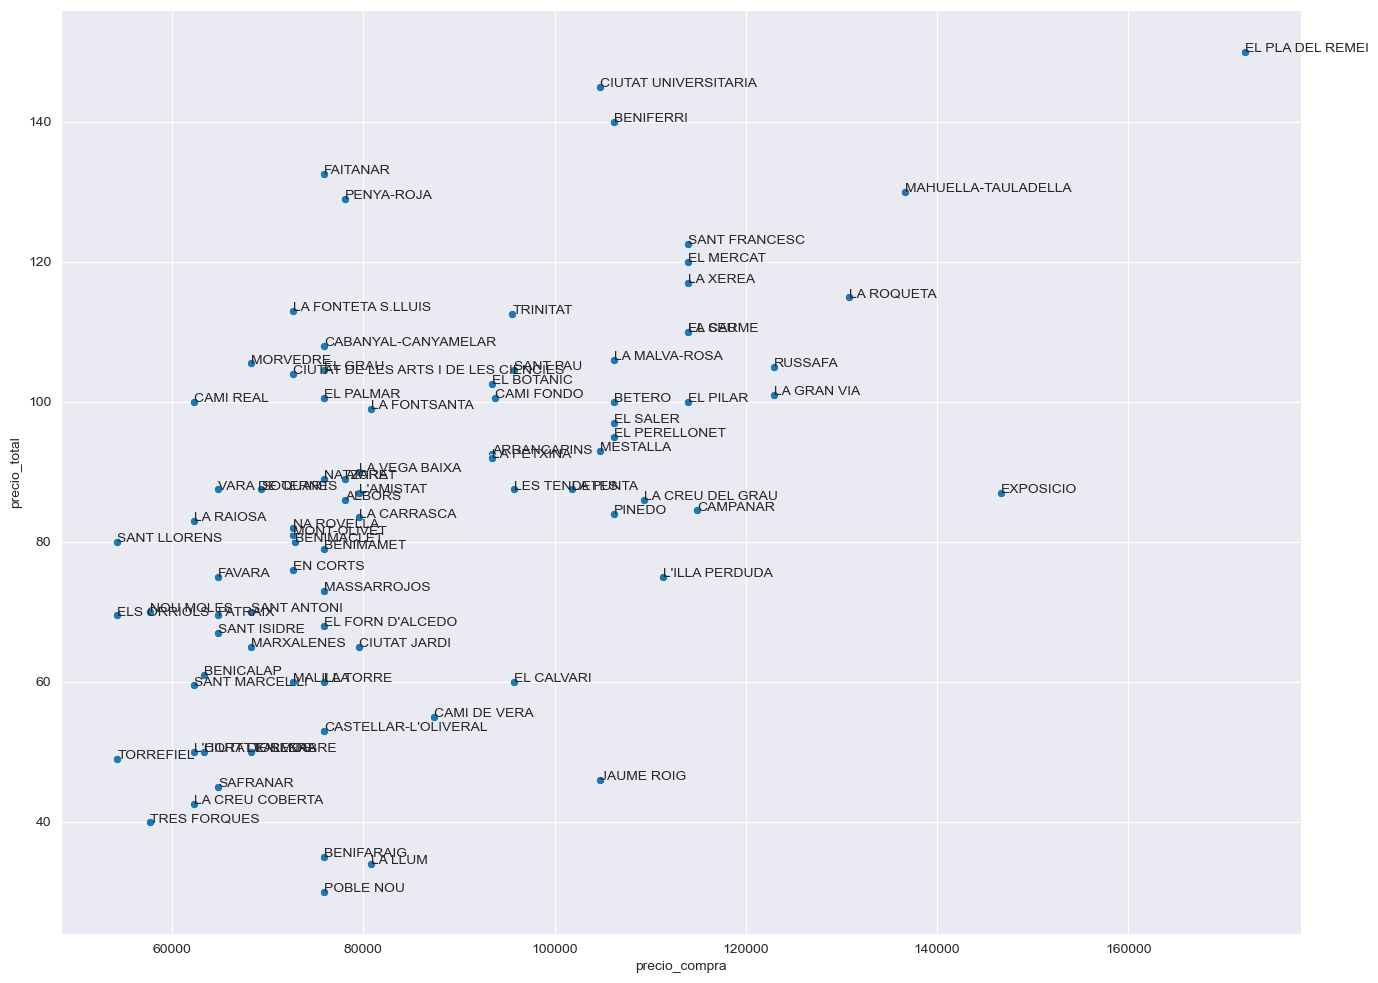

In [28]:
no_incluir = ['CARPESA']

temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total');
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])



### Buscar inmuebles de 2 habitaciones

*  A partir de 2 habitaciones el precio de compra sube pero el que podemos cobra baja


**Exhibit 1.4.2**

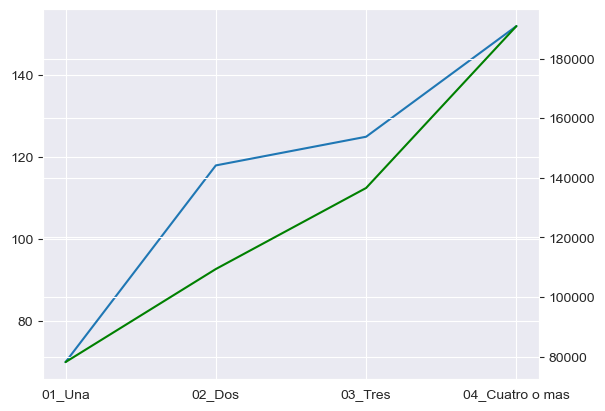

In [11]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

### Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés

* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

**Exhibit 1.4.3**

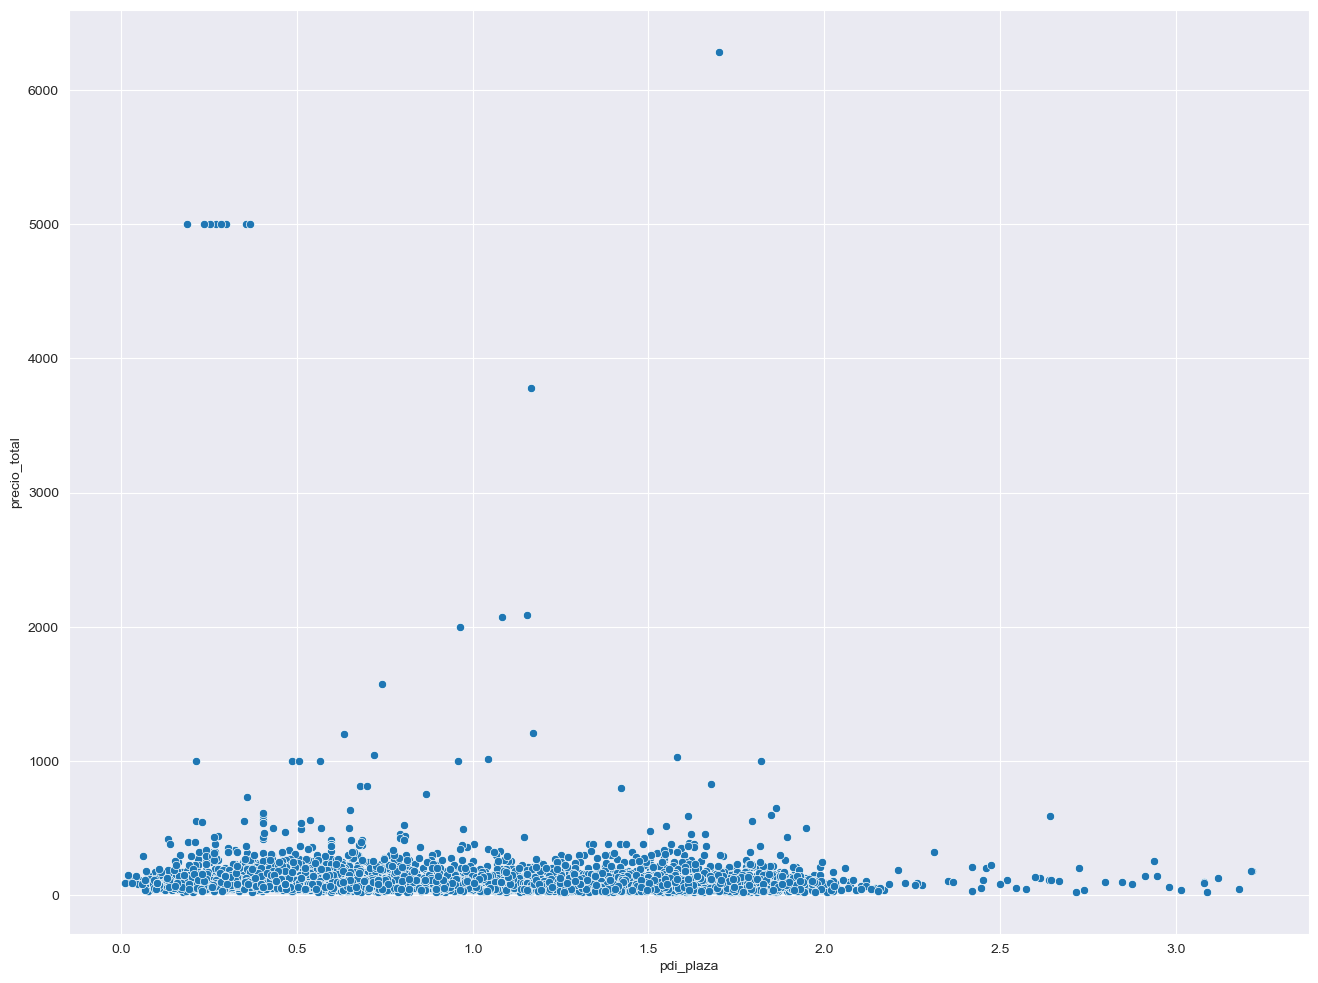

In [15]:
seleccion = df.groupby('distrito').pdi_plaza.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_plaza', y = 'precio_total');

### Priorizar comprar inmuebles  de 70 m2

- Evitar los de 50 m2

**Exhibit 1.4.4**

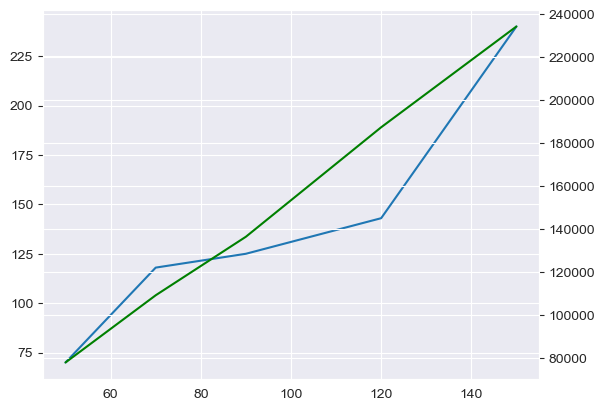

In [13]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['m2'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['m2'].precio_compra,color = 'green');

### Principales resultados para alquileres de larga estacia

#### Priorizar alquilar apartamentos completos

- Priorizar compra de apartamentos completos

- Priorar compra de Shared room frente Private room, son más económicas y tienen un precio medio superior

**Exhibit 1.4.5**

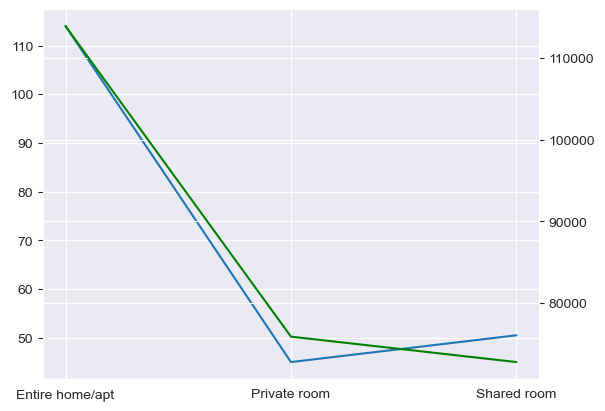

In [16]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['room_type'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['room_type'].precio_compra,color = 'green');

#### Existen 2 barrios óptimos para larga estancia según precio alquiler

Además podemos segmentarlos por el porcentaje de ocupación en el que nos interese invertir:
   * Ocupación media-precio alquiler alto : EL PLA DEL REI
   * Ucupación alta-precio alquiler alto: CARPESA ( no consderaremos esta opción, ya que, solo disponemos de un dato


**Exhibit 1.4.6**

C:\Users\pedro\AppData\Local\Temp\ipykernel_16692\388215789.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_total[cada], temp.ocupacion[cada], temp.index[cada])


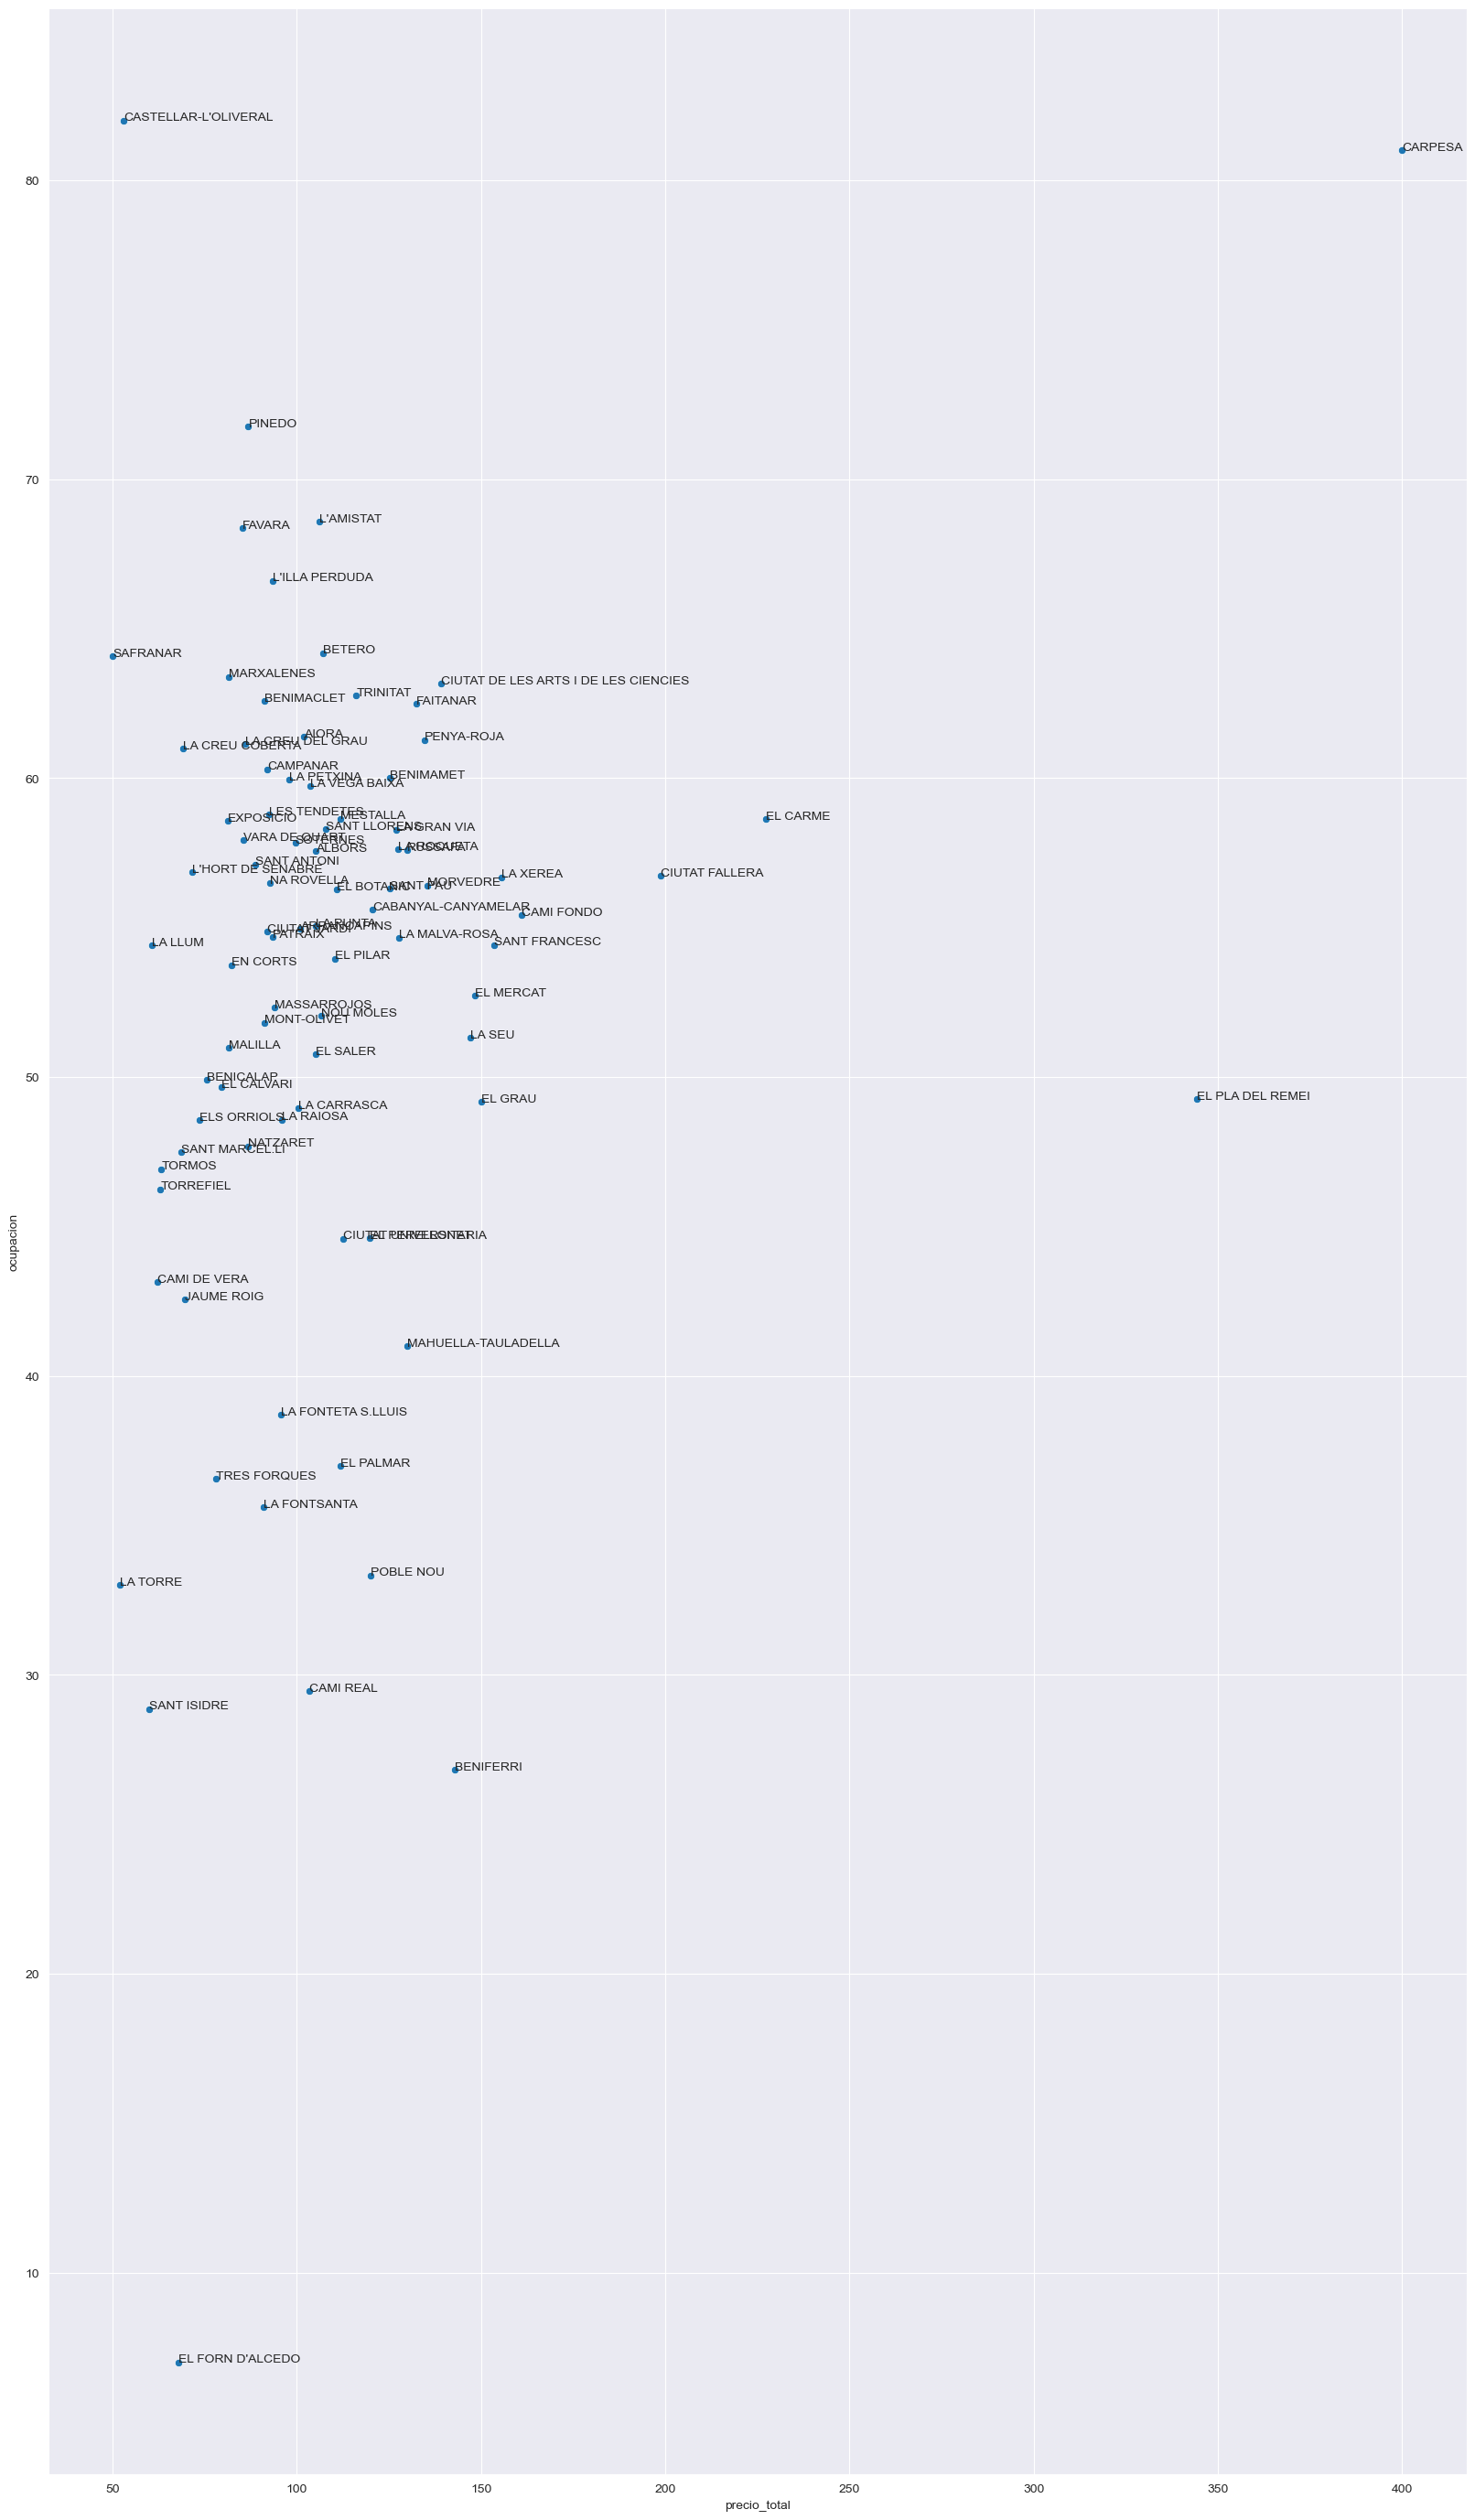

In [21]:
no_incluir= ['BENIFARAIG']
temp = df.groupby('neighbourhood')[['precio_total','ocupacion']].mean()
temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (20,35))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total[cada], temp.ocupacion[cada], temp.index[cada])

#### Buscar inmuebles de 2 habitaciones frente 3

* Optar por invertir en alojamientos de 02 habitaciones frente a los de 03, tienen misma ocupacion (%) y son mas baratos

**Exhibit 1.4.7**

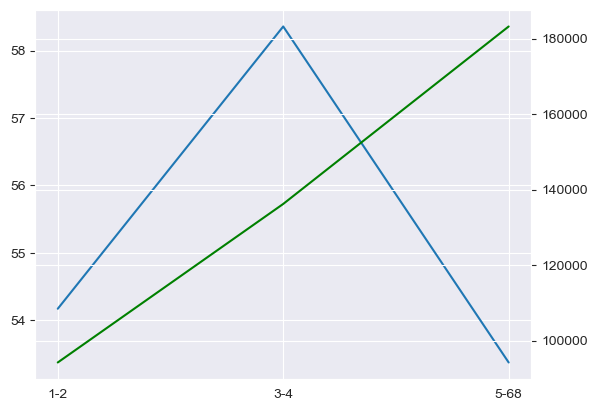

In [23]:
metricas = ['ocupacion','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc','m2','neighbourhood','distrito']

minicubo_ocupacion = df[dimensiones + metricas]
minicubo_ocupacion = minicubo_ocupacion.melt(id_vars=['ocupacion','precio_compra'])
minicubo_ocupacion = minicubo_ocupacion.groupby(['variable','value'])[['ocupacion','precio_compra']].agg('mean')                                                      

f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['beds_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['beds_disc'].precio_compra,color = 'green');

#### Buscar inmuebles con 3-4 camas

* Viviendas para 4-5 personas tienen la mayor tasa de ocupación conun precio de compra medio

**Exhibit 1.4.8**

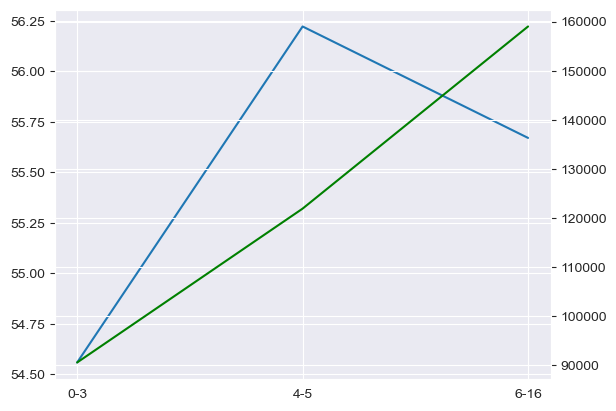

In [24]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['accommodates_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['accommodates_disc'].precio_compra,color = 'green');

#### El tamaño del inmueble influye en la ocupacion

 Dependiendo del tipo de inversión, podemos distinguir dos tipos de compra:
   - **Ocupación media - inversión media**: Priorizar compra de alojamientos de 70 m2 frente los de 90 m2, tienen misma ocupación y son mas baratos de comprar
   - **Ocupación alta- inversión alta** :Evitar compra de pisos de 150 m2,  priorizar la compra de los  120 m2, tienen la mayor tasa de ocupacion, y son mas económicos ( 60.000€ de media) 

**Exhibit 1.4.9**

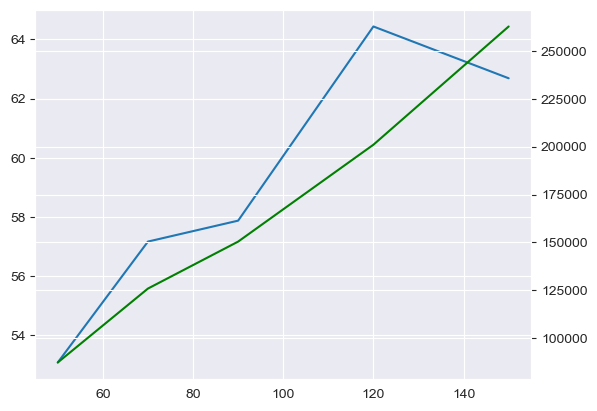

In [27]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['m2'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['m2'].precio_compra,color = 'green');